<a href="https://colab.research.google.com/github/SeungHwan-Do/CJ_Remote_Internship/blob/main/0708/test0708_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 환경 설정

In [ ]:
# 라이브러리 설정
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터셋 불러오기

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#CSV파일을 읽어오기
drive_path = "/content/drive/MyDrive/"

train = pd.read_csv(drive_path + "dataset1.csv")

print(train.shape)

(1048575, 19)


In [ ]:
# train 데이터프레임 내용 확인
train.head(3)

,STND_Y,IDV_ID,KEY_SEQ,SEX,AGE_GROUP,SIDO,RECU_FR_DT,FORM_CD,DSBJT_CD,MAIN_SICK,SUB_SICK,VSCN,RECN,EDEC_ADD_RT,EDEC_TRAMT,EDEC_SBRDN_AMT,EDEC_JBRDN_AMT,TOT_PRES_DD_CNT,DATA_STD_DT
0,2020,29,3724043,1,17,41,2020-12-21,3,1,I109,E785,1,1,0.15,11540,1500,10040,0,2021-12-28
1,2020,29,3495225,1,17,41,2020-12-14,3,1,I109,E785,1,1,0.15,11540,1500,10040,7,2021-12-28
2,2020,255,10615350,2,18,41,2020-04-20,3,1,I109,I251,1,1,0.15,11540,1500,10040,30,2021-12-28


# 데이터 살펴보기

### 데이터 구조

In [ ]:
# train 데이터프레임 개요 정보
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 19 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   STND_Y           1048575 non-null  int64  
 1   IDV_ID           1048575 non-null  int64  
 2   KEY_SEQ          1048575 non-null  int64  
 3   SEX              1048575 non-null  int64  
 4   AGE_GROUP        1048575 non-null  int64  
 5   SIDO             1048575 non-null  int64  
 6   RECU_FR_DT       1048575 non-null  object 
 7   FORM_CD          1048575 non-null  int64  
 8   DSBJT_CD         1048575 non-null  int64  
 9   MAIN_SICK        1048575 non-null  object 
 10  SUB_SICK         1048575 non-null  object 
 11  VSCN             1048575 non-null  int64  
 12  RECN             1048575 non-null  int64  
 13  EDEC_ADD_RT      1048575 non-null  float64
 14  EDEC_TRAMT       1048575 non-null  int64  
 15  EDEC_SBRDN_AMT   1048575 non-null  int64  
 16  EDEC_JBRDN_AMT   1

In [ ]:
# train 데이터프레임 통계정보
train.describe(include='all')

,STND_Y,IDV_ID,KEY_SEQ,SEX,AGE_GROUP,SIDO,RECU_FR_DT,FORM_CD,DSBJT_CD,MAIN_SICK,SUB_SICK,VSCN,RECN,EDEC_ADD_RT,EDEC_TRAMT,EDEC_SBRDN_AMT,EDEC_JBRDN_AMT,TOT_PRES_DD_CNT,DATA_STD_DT
count,1048575.0,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1048575,1.048575e+06,1.048575e+06,1048575,1048575,1048575.0,1048575.0,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1048575
unique,NaN,NaN,NaN,NaN,NaN,NaN,366,NaN,NaN,4169,4222,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
top,NaN,NaN,NaN,NaN,NaN,NaN,2020-01-28,NaN,NaN,I109,J304,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-12-28
freq,NaN,NaN,NaN,NaN,NaN,NaN,7005,NaN,NaN,141027,61492,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1048575
mean,2020.0,1.661755e+05,5.659551e+06,1.562559e+00,1.123280e+01,3.369546e+01,NaN,2.999735e+00,6.451292e+00,NaN,NaN,1.0,1.0,1.500000e-01,1.549178e+04,3.198712e+03,1.229186e+04,1.467077e+01,NaN
std,0.0,9.611398e+04,3.406616e+06,4.960712e-01,4.770835e+00,1.278442e+01,NaN,1.628041e-02,6.457953e+00,NaN,NaN,0.0,0.0,2.775559e-17,1.828412e+04,2.523003e+03,1.667087e+04,1.926278e+01,NaN
min,2020.0,2.000000e+00,1.000000e+01,1.000000e+00,1.000000e+00,1.100000e+01,NaN,2.000000e+00,0.000000e+00,NaN,NaN,1.0,1.0,1.500000e-01,1.530000e+03,0.000000e+00,3.000000e+01,0.000000e+00,NaN
25%,2020.0,8.318050e+04,2.617641e+06,1.000000e+00,8.000000e+00,2.700000e+01,NaN,3.000000e+00,1.000000e+00,NaN,NaN,1.0,1.0,1.500000e-01,1.154000e+04,1.500000e+03,9.620000e+03,3.000000e+00,NaN
50%,2020.0,1.662400e+05,5.558405e+06,2.000000e+00,1.200000e+01,4.100000e+01,NaN,3.000000e+00,4.000000e+00,NaN,NaN,1.0,1.0,1.500000e-01,1.362000e+04,3.400000e+03,1.083000e+04,5.000000e+00,NaN
75%,2020.0,2.491910e+05,8.592534e+06,2.000000e+00,1.500000e+01,4.400000e+01,NaN,3.000000e+00,1.300000e+01,NaN,NaN,1.0,1.0,1.500000e-01,1.614000e+04,4.200000e+03,1.212000e+04,3.000000e+01,NaN


### 결측값 확인

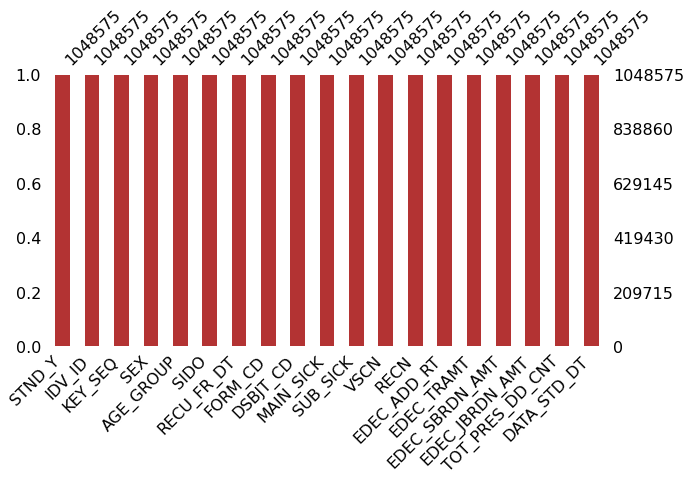

In [ ]:
# 결측값 분포
import missingno as msno
msno.bar(train, figsize=(10, 5), color=(0.7, 0.2, 0.2))
plt.show()

### 데이터 전처리

# 피처 엔지니어링
- 문자열, 범주형 변수를 포함
- 데이터 탐색(EDA) 및 전처리(pre-processing) 포함

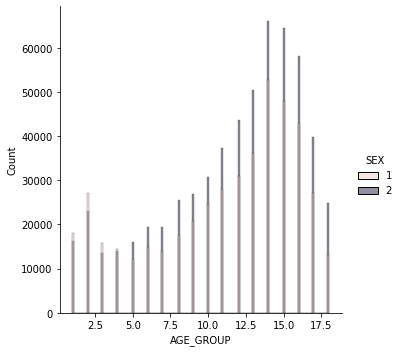

In [ ]:
# Age 분포
sns.displot(x='AGE_GROUP', kind='hist', hue='SEX', 
            data=train,)
plt.show()

In [ ]:
train['RECU_FR_DT'] = pd.to_datetime(train['RECU_FR_DT'])
train['month']=train['RECU_FR_DT'].dt.month
#train['spring']=np.where((train['month']==3) or (train['month']==4) or (train['month']==5),'1','0')
train['season'] = "winter"
train.loc[train['month']<12, 'season']="fall"
train.loc[train['month']<9, 'season']="summer"
train.loc[(train['month']<6)& (train['month']>=3), 'season']="spring"
train.loc[(train['month']==1)| (train['month']==2), 'season']="winter"


In [ ]:
train['desease']=None
train.loc[(train['MAIN_SICK']>"H09")&(train['MAIN_SICK']<"H11"), 'desease']=train['MAIN_SICK']

In [ ]:
train.loc[(train['MAIN_SICK']>="J00")&(train['MAIN_SICK']<"J07"), 'cold']=1

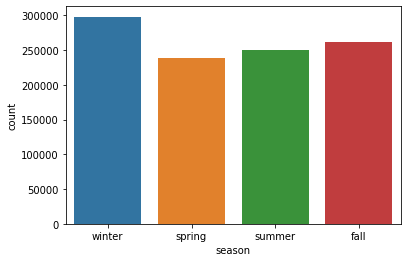

In [ ]:
ax=sns.countplot(x = 'season', data=train)

plt.show()

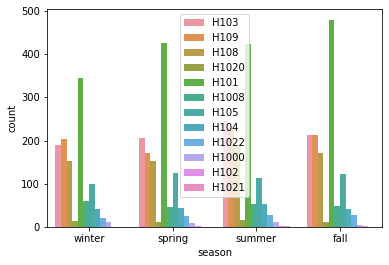

In [ ]:
sns.countplot(x = 'season', hue = 'desease', data=train)
plt.legend(loc='best')
plt.show()

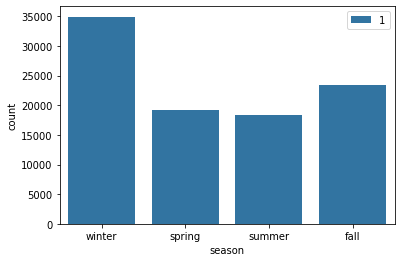

In [ ]:
sns.countplot(x = 'season', hue = 'cold', data=train)
plt.legend(loc='best')
plt.show()